In [157]:
pip install requests pandas nltk transformers

In [158]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [159]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [160]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [161]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [162]:
import requests
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk import pos_tag
from nltk.stem import PorterStemmer

In [163]:
import pandas as pd

with open('events.txt', 'r', encoding='utf-8') as file:
    content = file.read()

print("File Content:")
print(content)

File Content:

1. Join us for the **Tech Conference 2023** on **May 10, 2023**, in **San Francisco, CA**, where experts discuss the future of AI.
2. Don't miss the **Music Festival** happening on **June 15, 2023**, in **New Orleans, LA**, featuring a lineup of popular bands.
3. Visit the **Art Exhibition** opening on **July 20, 2023**, in **New York, NY**, to explore works by contemporary artists.
4. Participate in the annual **Charity Run** on **August 5, 2023**, in **Chicago, IL**, to support local charities.
5. Taste the best of local cuisine at the **Food Fair** on **September 12, 2023**, in **Austin, TX**.
6. Attend the **Annual Book Fair** on **October 1, 2023**, in **Los Angeles, CA**, celebrating literature and authors.
7. Experience the **Winter Wonderland Festival** on **December 1, 2023**, in **Denver, CO**, filled with holiday cheer.
8. Join the **Global Startup Summit** on **November 10, 2023**, in **Singapore**, showcasing innovative entrepreneurs.
9. Celebrate the **Summ

In [164]:
# Split the content into lines
lines = content.split('\n')

# Create a DataFrame from the lines
df = pd.DataFrame(lines, columns=['text'])

# Initialize stop words and stemmer for English
stop_words_en = set(stopwords.words('english'))
stemmer_en = PorterStemmer()

# Preprocess text
def preprocess(text):
    # Normalization: Convert to lowercase
    text = text.lower()
    # Remove special characters and extra whitespace
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words_en]

    return ' '.join(tokens)

# Apply preprocessing to the text
df['text'] = df['text'].apply(preprocess)
print(df['text'].head(10))

0                                                     
1    1 join us tech conference 2023 may 10 2023 san...
2    2 dont miss music festival happening june 15 2...
3    3 visit art exhibition opening july 20 2023 ne...
4    4 participate annual charity run august 5 2023...
5    5 taste best local cuisine food fair september...
6    6 attend annual book fair october 1 2023 los a...
7    7 experience winter wonderland festival decemb...
8    8 join global startup summit november 10 2023 ...
9    9 celebrate summer solstice june 21 2023 stone...
Name: text, dtype: object


In [165]:
import spacy
import pandas as pd

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

In [166]:
# Function for Named Entity Recognition (NER)
def extract_entities(text):
    doc = nlp(text)
    entities = {ent.label_: ent.text for ent in doc.ents}
    return entities

# Apply NER to the DataFrame
df['entities'] = df['text'].apply(extract_entities)

# Part-of-Speech (POS) Tagging
def pos_tagging(text):
    doc = nlp(text)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

# Apply POS tagging to the DataFrame
df['pos_tags'] = df['text'].apply(pos_tagging)

# Display the DataFrame with extracted features
print("DataFrame with Extracted Features:")
print(df[['text']])
print(df[['entities']])
print(df[['pos_tags']])

DataFrame with Extracted Features:
                                                  text
0                                                     
1    1 join us tech conference 2023 may 10 2023 san...
2    2 dont miss music festival happening june 15 2...
3    3 visit art exhibition opening july 20 2023 ne...
4    4 participate annual charity run august 5 2023...
5    5 taste best local cuisine food fair september...
6    6 attend annual book fair october 1 2023 los a...
7    7 experience winter wonderland festival decemb...
8    8 join global startup summit november 10 2023 ...
9    9 celebrate summer solstice june 21 2023 stone...
10   10 explore science technology expo april 15 20...
11   11 attend fashion week september 815 2023 pari...
12   12 participate culinary workshop march 25 2023...
13   13 join yoga retreat august 1219 2023 sedona a...
14   14 celebrate earth day april 22 2023 portland ...
15   15 attend jazz festival july 46 2023 newport r...
16   16 join tech innovation s

In [167]:
def extract_relationships(text):
    doc = nlp(text)
    relationships = []
    for token in doc:
        if token.dep_ == 'nsubj':
            relationships.append((token.text, token.head.text))
    return relationships

df['relationships'] = df['text'].apply(extract_relationships)

In [168]:
from textblob import TextBlob

def sentiment_analysis(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['text'].apply(sentiment_analysis)
print(df['sentiment'])

0      0.000000
1      0.000000
2      0.368182
3      0.151515
4      0.000000
5      0.566667
6      0.700000
7      0.400000
8      0.250000
9      0.000000
10     0.500000
11     0.500000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.136364
17     0.100000
18     0.283333
19     0.136364
20     0.000000
21     0.700000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.700000
27     0.100000
28     0.700000
29     0.000000
30    -0.056818
31     0.000000
32     0.045455
33     0.000000
34     0.318182
35     0.000000
36     0.000000
37     0.000000
38     0.150000
39     0.700000
40     0.000000
41     0.000000
42     0.000000
43     0.000000
44     0.000000
45     0.000000
46     0.500000
47     0.000000
48     0.000000
49     0.300000
50    -0.056818
51     0.000000
52     0.850000
53     0.000000
54     0.136364
55     0.000000
56     0.000000
57     0.400000
58     0.000000
59     0.000000
60     0.136364
61     0.000000
62     0

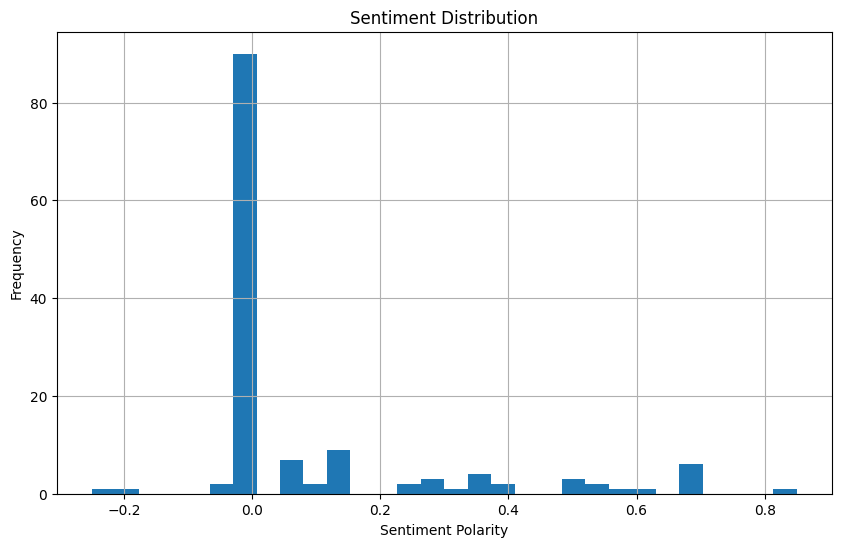

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['sentiment'].hist(bins=30)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [170]:
df.to_csv('enriched_data.csv', index=False)

In [171]:
df

,text,entities,pos_tags,relationships,sentiment
0,,{},[],[],0.000000
1,1 join us tech conference 2023 may 10 2023 san...,"{'CARDINAL': '1', 'DATE': '2023 may 10 2023'}","[(1, NUM), (join, VERB), (us, PROPN), (tech, N...","[(experts, discuss)]",0.000000
2,2 dont miss music festival happening june 15 2...,"{'CARDINAL': '2', 'DATE': 'june 15 2023', 'GPE...","[(2, NUM), (do, AUX), (nt, PART), (miss, VERB)...","[(2, miss)]",0.368182
3,3 visit art exhibition opening july 20 2023 ne...,"{'CARDINAL': '3', 'DATE': 'july 20 2023', 'GPE...","[(3, NUM), (visit, NOUN), (art, NOUN), (exhibi...","[(exhibition, explore), (ny, explore)]",0.151515
4,4 participate annual charity run august 5 2023...,"{'CARDINAL': '4', 'DATE': 'august 5 2023', 'GP...","[(4, NUM), (participate, VERB), (annual, ADJ),...","[(4, participate), (il, support)]",0.000000
5,5 taste best local cuisine food fair september...,{'CARDINAL': '5'},"[(5, NUM), (taste, VERB), (best, ADJ), (local,...",[],0.566667
6,6 attend annual book fair october 1 2023 los a...,"{'CARDINAL': '6', 'DATE': 'october 1 2023', 'G...","[(6, NUM), (attend, VERB), (annual, ADJ), (boo...","[(6, attend), (angeles, celebrating)]",0.700000
7,7 experience winter wonderland festival decemb...,"{'DATE': 'december 1 2023', 'GPE': 'denver'}","[(7, NUM), (experience, NOUN), (winter, NOUN),...",[],0.400000
8,8 join global startup summit november 10 2023 ...,"{'CARDINAL': '8', 'PRODUCT': 'global startup',...","[(8, NUM), (join, NOUN), (global, ADJ), (start...",[],0.250000
9,9 celebrate summer solstice june 21 2023 stone...,"{'CARDINAL': '9', 'DATE': 'june 21 2023'}","[(9, NUM), (celebrate, NOUN), (summer, NOUN), ...",[],0.000000


In [172]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the 'entities' column contains dictionaries
def extract_date_location(entities):
    date = None
    location = None
    if isinstance(entities, dict):  # Check if entities is a dictionary
        if 'DATE' in entities:
            date = entities['DATE']
        if 'GPE' in entities or 'LOC' in entities:
            if 'GPE' in entities:
                location = entities['GPE']
            elif 'LOC' in entities:
                location = entities['LOC']
    return pd.Series({'date': date, 'location': location})

df[['date', 'location']] = df['entities'].apply(extract_date_location)

print(df[['text', 'entities', 'date', 'location']])

                                                  text                                           entities                           date       location
0                                                                                                      {}                           None           None
1    1 join us tech conference 2023 may 10 2023 san...      {'CARDINAL': '1', 'DATE': '2023 may 10 2023'}               2023 may 10 2023           None
2    2 dont miss music festival happening june 15 2...  {'CARDINAL': '2', 'DATE': 'june 15 2023', 'GPE...                   june 15 2023    new orleans
3    3 visit art exhibition opening july 20 2023 ne...  {'CARDINAL': '3', 'DATE': 'july 20 2023', 'GPE...                   july 20 2023       new york
4    4 participate annual charity run august 5 2023...  {'CARDINAL': '4', 'DATE': 'august 5 2023', 'GP...                  august 5 2023        chicago
5    5 taste best local cuisine food fair september...                                  

In [173]:

import pandas as pd

def clean_dates(df):
    # Convert the 'date' column to string type to handle potential mixed data types
    df['date'] = df['date'].astype(str)

    # Define a regular expression pattern to match the desired date formats
    date_pattern = r"\b(?:\d{1,2}/\d{1,2}/\d{4}|\d{4}-\d{2}-\d{2}|\w+ \d{1,2}, \d{4}|\d{4})\b"

    # Create a boolean mask indicating rows that match the date pattern
    mask = df['date'].str.contains(date_pattern, regex=True)

    # Filter the DataFrame using the boolean mask
    df_filtered = df[mask]

    return df_filtered

# Assuming your DataFrame is named 'df'
df = clean_dates(df)
df

,text,entities,pos_tags,relationships,sentiment,date,location
1,1 join us tech conference 2023 may 10 2023 san...,"{'CARDINAL': '1', 'DATE': '2023 may 10 2023'}","[(1, NUM), (join, VERB), (us, PROPN), (tech, N...","[(experts, discuss)]",0.000000,2023 may 10 2023,None
2,2 dont miss music festival happening june 15 2...,"{'CARDINAL': '2', 'DATE': 'june 15 2023', 'GPE...","[(2, NUM), (do, AUX), (nt, PART), (miss, VERB)...","[(2, miss)]",0.368182,june 15 2023,new orleans
3,3 visit art exhibition opening july 20 2023 ne...,"{'CARDINAL': '3', 'DATE': 'july 20 2023', 'GPE...","[(3, NUM), (visit, NOUN), (art, NOUN), (exhibi...","[(exhibition, explore), (ny, explore)]",0.151515,july 20 2023,new york
4,4 participate annual charity run august 5 2023...,"{'CARDINAL': '4', 'DATE': 'august 5 2023', 'GP...","[(4, NUM), (participate, VERB), (annual, ADJ),...","[(4, participate), (il, support)]",0.000000,august 5 2023,chicago
6,6 attend annual book fair october 1 2023 los a...,"{'CARDINAL': '6', 'DATE': 'october 1 2023', 'G...","[(6, NUM), (attend, VERB), (annual, ADJ), (boo...","[(6, attend), (angeles, celebrating)]",0.700000,october 1 2023,los angeles
7,7 experience winter wonderland festival decemb...,"{'DATE': 'december 1 2023', 'GPE': 'denver'}","[(7, NUM), (experience, NOUN), (winter, NOUN),...",[],0.400000,december 1 2023,denver
8,8 join global startup summit november 10 2023 ...,"{'CARDINAL': '8', 'PRODUCT': 'global startup',...","[(8, NUM), (join, NOUN), (global, ADJ), (start...",[],0.250000,november 10 2023,singapore
9,9 celebrate summer solstice june 21 2023 stone...,"{'CARDINAL': '9', 'DATE': 'june 21 2023'}","[(9, NUM), (celebrate, NOUN), (summer, NOUN), ...",[],0.000000,june 21 2023,None
10,10 explore science technology expo april 15 20...,"{'CARDINAL': '10', 'DATE': 'april 15 2023', 'G...","[(10, NUM), (explore, VERB), (science, NOUN), ...","[(10, explore)]",0.500000,april 15 2023,boston
11,11 attend fashion week september 815 2023 pari...,"{'CARDINAL': '11', 'DATE': '2023', 'GPE': 'par...","[(11, NUM), (attend, VERB), (fashion, NOUN), (...","[(11, attend), (france, see)]",0.500000,2023,paris


In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

df_filtered = df.dropna(subset=['date', 'location'])

df = df_filtered.copy()
X = df['text']  # Features
y_date = df_filtered['date']
y_location = df_filtered['location']


In [175]:
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [176]:
X_train, X_test, y_train_date, y_test_date, y_train_location, y_test_location = train_test_split(
    X_vectorized, y_date, y_location, test_size=0.2, random_state=42
)

In [177]:
rf_date = RandomForestClassifier(n_estimators=100, random_state=42)
rf_location = RandomForestClassifier(n_estimators=100, random_state=42)
rf_date.fit(X_train, y_train_date)
rf_location.fit(X_train, y_train_location)

RandomForestClassifier(random_state=42)

In [178]:
predictions_date = rf_date.predict(X_test)
predictions_location = rf_location.predict(X_test)

# Combine Predictions into a DataFrame
predictions_df = pd.DataFrame({
    'Predicted Date': predictions_date,
    'Predicted Location': predictions_location
})

print(predictions_df)

   Predicted Date Predicted Location
0            2023       philadelphia
1            2023        los angeles
2            2023           new york
3            2023      san francisco
4            2023             boston
5            2023           new york
6            2023           new york
7            2023             boston
8     july 4 2023           new york
9            2023       philadelphia
10           2023            atlanta
11           2023             boston
12           2023            chicago


In [179]:

import joblib

# Save the trained models
joblib.dump(rf_date, 'rf_date_model.joblib')
joblib.dump(rf_location, 'rf_location_model.joblib')

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [180]:
import joblib

# Load the saved models
rf_date_model = joblib.load('rf_date_model.joblib')
rf_location_model = joblib.load('rf_location_model.joblib')
vectorizer = joblib.load('tfidf_vectorizer.joblib')

In [181]:

import pandas as pd
import joblib

def predict_date_location(text):

    # Vectorize the input text
    text_vectorized = vectorizer.transform([text]) # The input to transform should be a list containing a single string

    # Predict the date and location
    predicted_year = rf_date_model.predict(text_vectorized)[0]
    predicted_location = rf_location_model.predict(text_vectorized)[0]

    return predicted_date, predicted_location


test_texts = [
    "Conference in London on 2024-04-20.",
    "Party in Paris on May 5, 2024",
    "Meeting in Tokyo on 2023-12-25."
]

# Iterate through each text in the list and predict individually
for text in test_texts:
    predicted_date, predicted_location = predict_date_location(text) # Call the prediction function with each individual text string
    print(f"Text: {text}")
    print(f"Predicted Year: {predicted_date}")
    print(f"Predicted Location: {predicted_location}")
    print("-" * 20)

Text: Conference in London on 2024-04-20.
Predicted Year: 2023
Predicted Location: atlanta
--------------------
Text: Party in Paris on May 5, 2024
Predicted Year: 2023
Predicted Location: atlanta
--------------------
Text: Meeting in Tokyo on 2023-12-25.
Predicted Year: 2023
Predicted Location: boston
--------------------
